<a href="https://colab.research.google.com/github/fuyu-quant/quantum_algorithm/blob/main/quantum_algorithm/blueqat/QNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 量子ニューラルネットワーク
* googleのCircuitで実装
* https://blueqat.com/yuichiro_minato2/2acf478d-7e60-4455-9e08-d51865692243
* 自動微分を実装したい

In [ ]:
%%capture
!pip install blueqat

In [1]:
from blueqat import Circuit
from blueqat.pauli import Z

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### データの作成

In [2]:
data = np.array([[8,3,83.74,18,22],[5,2,75.72,19,19],[7,2,31.47,46,7.8],[18,2,46.62,36,8],[8,3,41.02,49,8],[8,1,70.43,25,15.8],[8,1,70.43,25,15.8],[12,1,48.02,3,12.5],[10,4,58.57,36,11.8]])
df = pd.DataFrame(data,columns=['walk','floor','area','age','rent'])


#rent data
y = df["rent"]

#others
X = df.drop(columns=["rent"], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

### 量子回路の作成

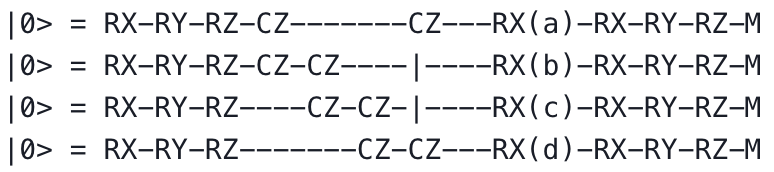

In [4]:
# 入力データが4なので4量子ビット
N = 4

# ハイパーパラメータは4×6で24個
np.random.seed = 1
params = [np.random.rand() for _ in range(N*6)]

# 測定するハミルトニアン
hamiltonian = 1*Z[0]*Z[1]*Z[2]*Z[3]

h = 1e-6
e = 0.1

In [5]:
arr_loss = []

for k in range(100):

    for item, answer in zip(X_train.values, y_train.values):

        # 量子回路作成
        circuit = Circuit()
        # 最初のRx,Ry,Rzの追加
        for i in range(N):
            circuit.rx(params[i*3+0])[i].ry(params[i*3+1])[i].rz(params[i*3+2])[i]
        # CZの追加
        circuit.cz[0,1].cz[1,2].cz[2,3].cz[3,0]
        # データを入力するRxゲートの追加
        for i in range(N):
            circuit.rx(np.pi*2*item[i]/100)[i]
        # 最後のRx,Ry,Rzの追加
        for i in range(N):
            circuit.rx(params[i*3+N*3])[i].ry(params[i*3+N*3+1])[i].rz(params[i*3+N*3+2])[i]

        # 予測の出力
        expt = circuit.run(hamiltonian = hamiltonian)
        loss = (expt - answer/100)**2
        
        grad_temp = np.zeros(N*6)
        
        # 以下がパラメータ更新用？
        for j in range(N*6):
            params_temp = params[:]
            angle_temp = params_temp[j]
            params_temp[j] += h
            

            # 量子回路作成
            circuit = Circuit()
            for i in range(N):
                circuit.rx(params_temp[i*3+0])[i].ry(params_temp[i*3+1])[i].rz(params_temp[i*3+2])[i]
            circuit.cz[0,1].cz[1,2].cz[2,3].cz[3,0]
            for i in range(N):
                circuit.rx(np.pi*2*item[i]/100)[i]
            for i in range(N):
                circuit.rx(params_temp[i*3+N*3])[i].ry(params_temp[i*3+N*3+1])[i].rz(params_temp[i*3+N*3+2])[i]
        
            # 予測の出力
            expt_temp = circuit.run(hamiltonian = hamiltonian)
            loss_temp = (expt_temp - answer/100)**2
            
            grad_temp[j] = (loss_temp - loss)/h
        
        # パラメータ更新
        params -= grad_temp*e
        
    arr_loss.append(loss)
    print(loss)

0.023055513662313957
0.017334308933768063
0.01144114862707116
0.006996931506872942
0.004340852404014308
0.0028633439607294114
0.002020761285110122
0.0015097305599462497
0.0011710620171911286
0.0009159702425485363
0.0006956621473532893
0.000493651294027489
0.00031832572851348836
0.00018450545704672293
9.616435431715326e-05
4.483633536626459e-05
1.7989139177256457e-05
5.405391237740375e-06
6.525475218946055e-07
1.8310736345617594e-07
2.156422760544224e-06
5.628695571268455e-06
1.010118068087878e-05
1.5290810564219637e-05
2.101898141730534e-05
2.7158946512882032e-05
3.3611333526793546e-05
4.029289921557038e-05
4.713140611532737e-05
5.4063263238124665e-05
6.103236696838814e-05
6.798943010259857e-05
7.489148678283137e-05
8.170144659374531e-05
8.838765395548843e-05
9.49234438789157e-05
0.0001012866982447925
0.00010745941045858965
0.00011342726523806224
0.00011917923947704847
0.0001247072274690799
0.00013000569255494168
0.0001350713461348804
0.00013990285378887867
0.00014450056783343052
0.000

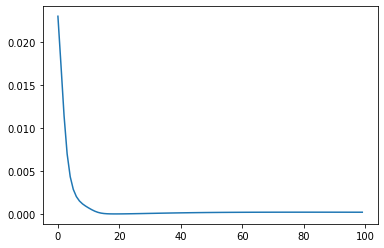

In [6]:
import matplotlib.pyplot as plt

plt.plot(arr_loss)
plt.show()

In [7]:
X_test = [9,5,58.3,34]

circuit = Circuit()
        
for i in range(N):
    circuit.rx(params[i*3+0])[i].ry(params[i*3+1])[i].rz(params[i*3+2])[i]

circuit.cz[0,1].cz[1,2].cz[2,3].cz[3,0]

for i in range(N):
    circuit.rx(np.pi*2*X_test[i]/100)[i]
    
for i in range(N):
    circuit.rx(params[i*3+N*3])[i].ry(params[i*3+N*3+1])[i].rz(params[i*3+N*3+2])[i]
        
expt = circuit.run(hamiltonian = hamiltonian)
print(expt*100)

11.8686123850387
